# Introduction to Regression with Neural Networks in TensorFlow

Predicting a numerical variable based on input features

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.2'

## Creating Data to view and fit

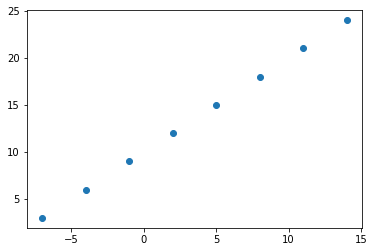

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

X = tf.constant(X)
y = tf.constant(y)

plt.scatter(X, y);

In [ ]:
y == X + 10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

## Input and Output Shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

## Steps in modelling with TensorFlow

1. Creating a model - define layers
2. Compiling a model - define loss function, optimizer, and evaluation metrics
3. Fitting a model - "training" a model to find patterns in the input data

In [ ]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 10.3123 - mae: 10.3123


In [ ]:
model.predict([17.0])

array([[15.741023]], dtype=float32)

## Improving our model

1. Add more layers, increase the number of neurons, change the activation function of each layer
2. Change optimization function or learning rate of the optimization function
3. Fit more model for more epochs, or on more data

In [ ]:
X_full_train = tf.random.uniform(shape=[5000], maxval=100)
y_full_train = X_full_train + 10

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),                             
  tf.keras.layers.Dense(100, activation="relu"),                             
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)                            
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])
model.fit(tf.expand_dims(X_full_train, axis=-1), y_full_train, epochs=100)

Epoch 1/100
157/157 [==============================] - 2s 5ms/step - loss: 25.6076 - mae: 25.6076
Epoch 2/100
157/157 [==============================] - 1s 4ms/step - loss: 3.9683 - mae: 3.9683
Epoch 3/100
157/157 [==============================] - 1s 5ms/step - loss: 3.8756 - mae: 3.8756
Epoch 4/100
157/157 [==============================] - 1s 4ms/step - loss: 3.7610 - mae: 3.7610
Epoch 5/100
157/157 [==============================] - 1s 4ms/step - loss: 3.6345 - mae: 3.6345
Epoch 6/100
157/157 [==============================] - 1s 5ms/step - loss: 3.5058 - mae: 3.5058
Epoch 7/100
157/157 [==============================] - 1s 5ms/step - loss: 3.3493 - mae: 3.3493
Epoch 8/100
157/157 [==============================] - 1s 5ms/step - loss: 3.1565 - mae: 3.1565
Epoch 9/100
157/157 [==============================] - 1s 5ms/step - loss: 2.9013 - mae: 2.9013
Epoch 10/100
157/157 [==============================] - 1s 5ms/step - loss: 2.6217 - mae: 2.6217
Epoch 11/100
157/157 [===============

In [ ]:
model.predict(tf.constant([20]))

array([[30.039042]], dtype=float32)

In [ ]:
X_full_train[40], y_full_train[40]

(<tf.Tensor: shape=(), dtype=float32, numpy=40.1173>,
 <tf.Tensor: shape=(), dtype=float32, numpy=50.1173>)

## Evaluation

Visualize, visualize, visualize

* What does the data we're working with look like
* What does the model look like
* How does a model perform while it learns
* How do the model predictions line up against the actual data

In [ ]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10

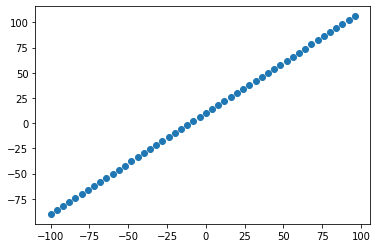

In [ ]:
plt.scatter(X,y);

In [ ]:
### The three sets

#training, validation and test


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=0.2)


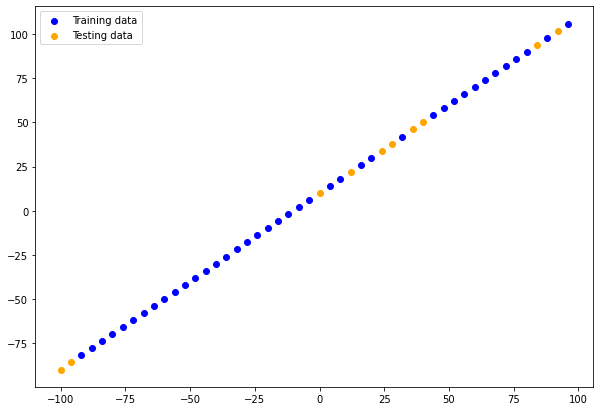

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="blue", label="Training data")
plt.scatter(X_test, y_test, c="orange", label="Testing data")
plt.legend();

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),                             
  tf.keras.layers.Dense(100, activation="relu"),                             
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)                            
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics=["mae"])
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=1000, verbose=2)

Epoch 1/1000
2/2 - 0s - loss: 48.5752 - mae: 48.5752 - 400ms/epoch - 200ms/step
Epoch 2/1000
2/2 - 0s - loss: 45.7293 - mae: 45.7293 - 11ms/epoch - 5ms/step
Epoch 3/1000
2/2 - 0s - loss: 43.2730 - mae: 43.2730 - 9ms/epoch - 5ms/step
Epoch 4/1000
2/2 - 0s - loss: 40.9087 - mae: 40.9087 - 9ms/epoch - 5ms/step
Epoch 5/1000
2/2 - 0s - loss: 38.6497 - mae: 38.6497 - 9ms/epoch - 4ms/step
Epoch 6/1000
2/2 - 0s - loss: 36.4012 - mae: 36.4012 - 9ms/epoch - 5ms/step
Epoch 7/1000
2/2 - 0s - loss: 34.2012 - mae: 34.2012 - 9ms/epoch - 5ms/step
Epoch 8/1000
2/2 - 0s - loss: 31.9624 - mae: 31.9624 - 9ms/epoch - 5ms/step
Epoch 9/1000
2/2 - 0s - loss: 29.7590 - mae: 29.7590 - 9ms/epoch - 4ms/step
Epoch 10/1000
2/2 - 0s - loss: 27.4176 - mae: 27.4176 - 9ms/epoch - 5ms/step
Epoch 11/1000
2/2 - 0s - loss: 24.7943 - mae: 24.7943 - 9ms/epoch - 5ms/step
Epoch 12/1000
2/2 - 0s - loss: 22.2803 - mae: 22.2803 - 9ms/epoch - 5ms/step
Epoch 13/1000
2/2 - 0s - loss: 19.5090 - mae: 19.5090 - 10ms/epoch - 5ms/step
Ep

In [ ]:
model.predict([-0])

array([[9.498659]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               200       
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


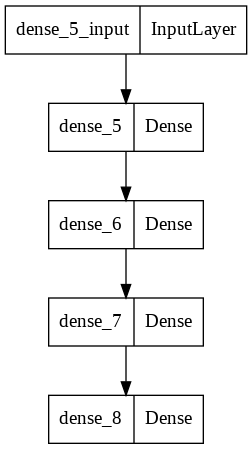

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model)

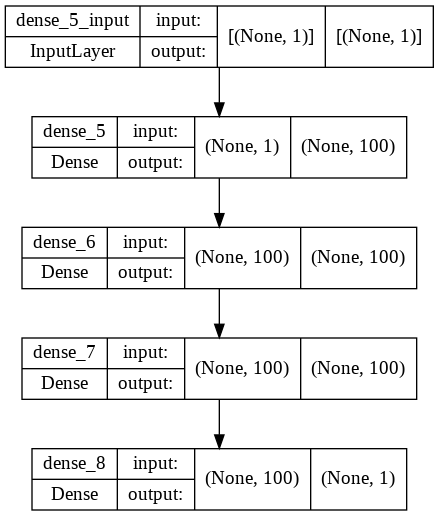

In [ ]:

plot_model(model=model, show_shapes=True)

In [ ]:
y_pred = model.predict(tf.constant(X_test))

In [ ]:
y_true = tf.constant(y_test)

In [ ]:
y_pred

array([[ 33.885937],
       [  9.498659],
       [ 22.02493 ],
       [-89.92579 ],
       [-85.97824 ],
       [ 49.78991 ],
       [101.85864 ],
       [ 37.83961 ],
       [ 45.78462 ],
       [ 93.84807 ]], dtype=float32)

In [ ]:
y_test

array([ 34,  10,  22, -90, -86,  50, 102,  38,  46,  94], dtype=int32)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="grey", label="Training data")
  plt.scatter(test_data, test_labels, c="blue", label="Testing data")
  plt.scatter(test_data, predictions, c="yellow", label="Predictions")
  plt.legend();

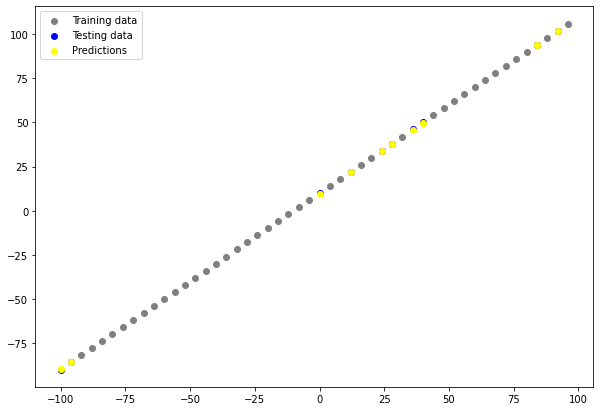

In [ ]:
plot_predictions()

### Evaluating our model with evaluation metrics

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 142ms/step - loss: 0.1615 - mae: 0.1615


[0.16154536604881287, 0.16154536604881287]

In [ ]:
tf.keras.losses.MAE(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 44.02281 ,  51.500805,  46.39501 , 111.94063 , 108.78694 ,
        47.115967,  79.88692 ,  44.      ,  45.556923,  73.508835],
      dtype=float32)>

In [ ]:
tf.metrics.mean_squared_error(tf.constant(y_test), tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.04302724>

In [ ]:
tf.metrics.mean_absolute_error(tf.constant(y_test), tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.16154537>

## Running experiments to improve our model

## Saving our models

In [ ]:
model.save("best_model")

INFO:tensorflow:Assets written to: best_model/assets


In [ ]:
model.save("best_modelinh5.h5")

## Loading in a saved model

In [ ]:
loaded_model = tf.keras.models.load_model("/content/best_modelinh5.h5")

In [ ]:
loaded_model.evaluate(tf.constant(X_test), tf.squeeze(y_test))

1/1 [==============================] - 0s 109ms/step - loss: 0.1615 - mae: 0.1615


[0.16154536604881287, 0.16154536604881287]

# A larger example

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)

In [ ]:
X = insurance_one_hot.drop(['charges'],axis=1)
y = insurance_one_hot['charges']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
len(X_train), len(y_train)

(1070, 1070)

In [ ]:
tf.constant(X_train)

<tf.Tensor: shape=(1070, 11), dtype=float64, numpy=
array([[44.   , 37.1  ,  2.   , ...,  0.   ,  0.   ,  1.   ],
       [24.   , 28.5  ,  2.   , ...,  1.   ,  0.   ,  0.   ],
       [47.   , 24.32 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [18.   , 31.68 ,  2.   , ...,  0.   ,  1.   ,  0.   ],
       [26.   , 30.875,  2.   , ...,  1.   ,  0.   ,  0.   ],
       [58.   , 36.955,  2.   , ...,  1.   ,  0.   ,  0.   ]])>

In [ ]:
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(0.0002),
                        metrics=["mae"])

history = insurance_model.fit(tf.constant(X_train), tf.constant(y_train), epochs=100, verbose=0)

In [ ]:
insurance_model.evaluate(tf.constant(X_test), tf.constant(y_test))

9/9 [==============================] - 0s 3ms/step - loss: 3830.6401 - mae: 3830.6401


[3830.64013671875, 3830.64013671875]

Text(0.5, 0, 'epochs')

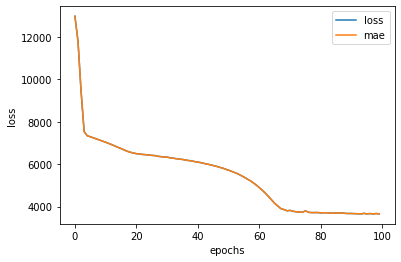

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop('charges', axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.iloc[0]

age                46
sex            female
bmi             19.95
children            2
smoker             no
region      northwest
Name: 560, dtype: object

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
insurance_model_normal = tf.keras.Sequential([
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(1)
])

insurance_model_normal.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(0.0001),
                        metrics=["mae"])

history = insurance_model_normal.fit(tf.constant(X_train_normal), tf.constant(y_train), epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 13333.6719 - mae: 13333.6719
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13203.0547 - mae: 13203.0547
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12585.3467 - mae: 12585.3467
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 10877.0518 - mae: 10877.0518
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 8784.6846 - mae: 8784.6846
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 8045.4185 - mae: 8045.4185
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7885.2988 - mae: 7885.2988
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7720.9829 - mae: 7720.9829
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7553.0347 - mae: 7553.0347
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7369.7988 - mae: 7

In [ ]:
insurance_model_normal.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3162.6199 - mae: 3162.6199


[3162.619873046875, 3162.619873046875]